In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [2]:
data = pd.read_csv('cleaned_biometric_data.csv')
data.head()

,date,state,minor,adult,total
0,01-03-2025,Haryana,280,577,857
1,01-03-2025,Bihar,144,369,513
2,01-03-2025,Jammu and Kashmir,643,1091,1734
3,01-03-2025,Bihar,256,980,1236
4,01-03-2025,Tamil Nadu,271,815,1086


In [3]:
data.columns

Index(['date', 'state', 'minor', 'adult', 'total'], dtype='object')

In [4]:
data.head()

,date,state,minor,adult,total
0,01-03-2025,Haryana,280,577,857
1,01-03-2025,Bihar,144,369,513
2,01-03-2025,Jammu and Kashmir,643,1091,1734
3,01-03-2025,Bihar,256,980,1236
4,01-03-2025,Tamil Nadu,271,815,1086


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766212 entries, 0 to 1766211
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   date    object
 1   state   object
 2   minor   int64 
 3   adult   int64 
 4   total   int64 
dtypes: int64(3), object(2)
memory usage: 67.4+ MB


In [6]:
data.shape

(1766212, 5)

In [7]:
data.describe()

,minor,adult,total
count,1.766212e+06,1.766212e+06,1.766212e+06
mean,1.894260e+01,1.970568e+01,3.864828e+01
std,8.581746e+01,9.030576e+01,1.664470e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.000000e+00
50%,4.000000e+00,4.000000e+00,8.000000e+00
75%,1.100000e+01,1.000000e+01,2.200000e+01
max,8.002000e+03,7.625000e+03,1.338100e+04


In [8]:
data[data['minor']==8.002000e+03]

,date,state,minor,adult,total
35938,01-04-2025,Uttar Pradesh,8002,1451,9453


In [9]:
data[data['adult']==7.625000e+03]

,date,state,minor,adult,total
36088,01-04-2025,Delhi,5180,7625,12805


In [10]:
data[data['total']==1.338100e+04]

,date,state,minor,adult,total
24461,01-04-2025,Delhi,5861,7520,13381


In [11]:
# convert data type of date column -> datetime 
data['date'] = pd.to_datetime(data['date'], errors = 'coerce', dayfirst=True)
data['date'].dtype

dtype('<M8[ns]')

In [12]:
data.head(1) # date -> yyyy-mm-dd

,date,state,minor,adult,total
0,2025-03-01,Haryana,280,577,857


In [13]:
data['date'].isnull().sum()

0

In [14]:
# create another column as year_month for monthly analysis 
data['date'] = data['date'].dt.to_period('M')
data.head(1)

,date,state,minor,adult,total
0,2025-03,Haryana,280,577,857


In [15]:
data['date'].dtype

period[M]

In [16]:
# converting numebr of updates to ratios 
data['minor'] = round((data['minor']/ data['total'])*100,1)
data['adult'] = round((data['adult']/ data['total'])*100,1)
data.head(1)

,date,state,minor,adult,total
0,2025-03,Haryana,32.7,67.3,857


# aggregate data 

In [17]:
monthly_bio_data = data.groupby(['state','date'],as_index=False).agg({'minor': 'mean','adult': 'mean','total': 'sum'})
monthly_bio_data['minor'] = round(monthly_bio_data['minor'],1) 
monthly_bio_data['adult'] = round(monthly_bio_data['adult'],1) 

monthly_bio_data.head()

,state,date,minor,adult,total
0,Andaman and Nicobar Islands,2025-03,58.8,41.2,2703
1,Andaman and Nicobar Islands,2025-04,59.4,40.6,2744
2,Andaman and Nicobar Islands,2025-05,48.6,51.4,1895
3,Andaman and Nicobar Islands,2025-06,43.3,56.7,1944
4,Andaman and Nicobar Islands,2025-07,41.9,58.1,2828


In [18]:
monthly_bio_data.shape

(324, 5)

In [19]:
data.head(1)

,date,state,minor,adult,total
0,2025-03,Haryana,32.7,67.3,857


In [20]:
# avg biomertric updates across india 
national_avg_per_month  = data.groupby('date',as_index=False).agg({'minor':'mean', 'adult': 'mean', 'total': 'sum'})
national_avg_per_month[['minor', 'adult']] = round(national_avg_per_month[['minor', 'adult']],1)

In [21]:
national_avg_per_month 

,date,minor,adult,total
0,2025-03,44.4,55.6,8322222
1,2025-04,47.5,52.5,8641679
2,2025-05,48.9,51.1,7879956
3,2025-06,46.4,53.6,7899289
4,2025-07,43.2,56.8,9792552
5,2025-09,45.6,54.4,6513507
6,2025-10,46.1,53.9,4233854
7,2025-11,47.2,52.8,6770804
8,2025-12,49.5,50.5,8207196


In [22]:
monthly_bio_data['date'].dtype

period[M]

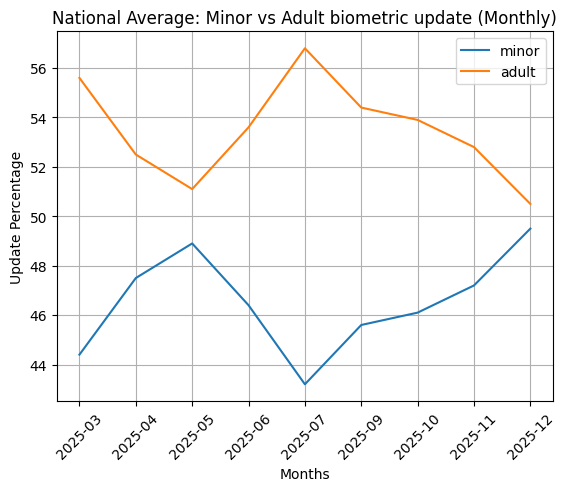

In [23]:
national_avg_per_month[['minor', 'adult']].plot(kind = 'line', title='National Average: Minor vs Adult biometric update (Monthly)')
plt.ylabel('Update Percentage')
x_labels = national_avg_per_month['date']
# Set x ticks and labels
plt.xticks( ticks=range(len(x_labels)), labels=x_labels, rotation=45)
plt.xlabel('Months')
plt.grid(True)

In [24]:
national_avg_per_month['date'] = national_avg_per_month['date'].dt.to_timestamp()

In [25]:
national_avg_per_month['date'].dtype

dtype('<M8[ns]')

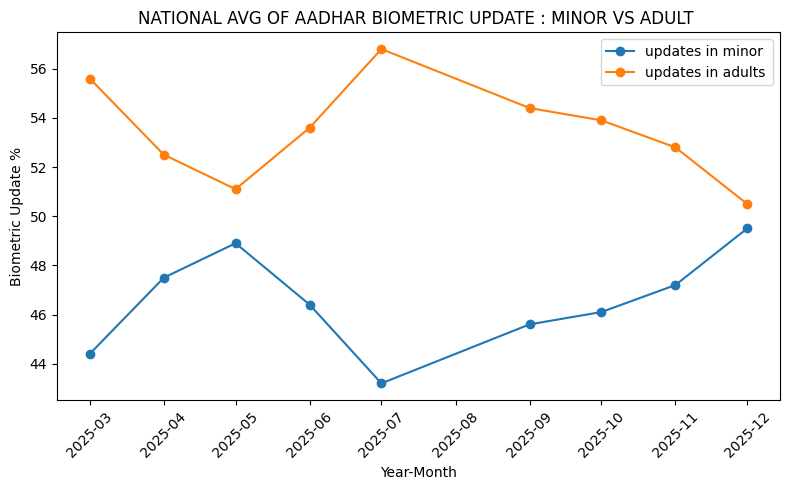

In [28]:
# plot minor vs adult 
plt.figure(figsize=(8,5))
plt.plot(national_avg_per_month['date'], national_avg_per_month['minor'], marker = 'o', label = 'updates in minor ')
plt.plot(national_avg_per_month['date'], national_avg_per_month['adult'], marker = 'o',label = 'updates in adults')
plt.xlabel('Year-Month')
plt.ylabel('Biometric Update %')
plt.title('NATIONAL AVG OF AADHAR BIOMETRIC UPDATE : MINOR VS ADULT ')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Adults dominate most months<br>
In almost all months, adult biometric updates are higher than minors.<br>
This indicates that adults are the primary contributors to biometric update activity nationally.

Observation 2: Minor updates peak in May & December<br>
May (49%) and December (49.5%) show the highest minor participation.<br>
December almost reaches a 50–50 split.

July shows the biggest gap
July has:
Minor ≈ 43%
Adult ≈ 57%<br>
This is the largest difference between adult and minor updates.<br>
Mid-year months may have fewer child-related update campaigns, while adult updates continue regularly.

Stable trend, no extreme fluctuations
The lines move smoothly, not sharply.<br>
Indicates:
Consistent biometric update behavior<br>
No sudden policy shock or data anomaly

In [27]:
#      Month	      Who updated more?	         Insight
#        Mar	          Adults	            Normal trend
#        Apr	          Adults	            Minor participation increases
#        May	          Almost equal	        High child updates
#        Jun	          Adults	            Minor drops
#        Jul	          Adults(highest gap)	Adult-heavy month
#        Sep–Nov	      Adults	            Stable dominance
#        Dec	         Almost equal	        Strong minor participation 